<a href="https://colab.research.google.com/github/WellysonP/AudioService/blob/master/audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from scipy.io import wavfile
import librosa as lib
import matplotlib
import matplotlib.pyplot as plt
from google.colab import files

In [4]:
# faz o upload do arquivo de áudio
uploaded = files.upload()

# carrega o arquivo de áudio com o nome do arquivo que você fez o upload
sinal1, fs1 = lib.load('test.wav')

Saving test.wav to test.wav


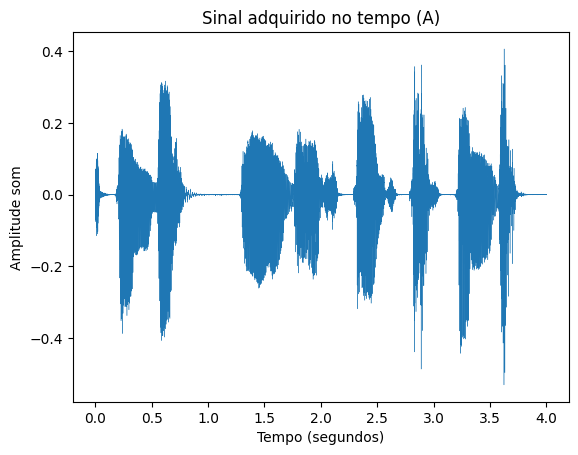

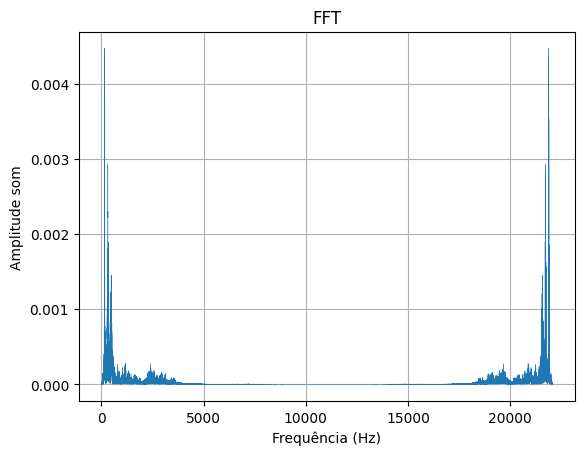

In [5]:
sinal1, fs1 = lib.load('test.wav')

sinal1 = sinal1[1*fs1:5*fs1]

Ts1 = 1/fs1 # período de amostragem
n = len(sinal1) # tamanho do vetor
t = np.arange(n)*Ts1 # intervalo de amostragem

# Realiza o janelamento do sinal utilizando a função de Hamming
janela = np.hamming(n)
sinal1_janelado = janela*sinal1

# Transformada de Fourier
Y1 = np.abs(np.fft.fft(sinal1_janelado))/n # FFT sinal normal

# Cria uma faixa de frequência para a FFT realizada, baseado na frequência de Nyquist
w = np.linspace(0, fs1, n)

# Plota o sinal no domínio do tempo
plt.figure(1)
plt.plot(t, sinal1, linewidth=0.3)
plt.title('Sinal adquirido no tempo (A)')
plt.ylabel('Amplitude som')
plt.xlabel('Tempo (segundos)')
# plt.savefig('dominio_tempo.png', dpi=300, bbox_inches='tight')



# Plota a FFT no domínio da frequência
plt.figure(2)
plt.plot(w, Y1, linewidth=0.3)
plt.grid()
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude som')
plt.title('FFT')
# plt.savefig('dominio_frequencia.png', dpi=300, bbox_inches='tight')

plt.show()